# Tomatoe Bight Projecct

## Imports

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path

print("Tensorflow version",tf.__version__)
print("Numpy version",np.__version__)
print("Matplolib version",tf.__version__)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
BASE_DIR = Path().resolve()
print(BASE_DIR)


COLAB = False

if not COLAB:
    BASE_DIR = "E:/BlightProject_CNN"

Tensorflow version 2.9.1
Numpy version 1.23.1
Matplolib version 2.9.1
E:\BlightProject_CNN


In [2]:
import urllib.request
import zipfile
import os


if COLAB:
  class ProcessingUtils():
          
    def zipfileDownload(self,url, ref_directory,file_name):
        '''
        Download zipfile containining image data
        url: link to zipfile
        file_name: name to save the file to
        '''
        print("Starting file download ...\n")
        file_name = os.path.join(ref_directory,file_name)
        res=urllib.request.urlretrieve(url,file_name)
        if res:
            print("Completed downloading ", res[0])
            return True
        print(f"Unsuccessful download!\n From link {url} to file {file_name}")
        return False

    def readZipFile(self,file_name,target_folder,ref_directory):
        '''
        read zipfile contents into a folder
        '''
        file_name = os.path.join(ref_directory,file_name)
        print(f"Starting {file_name} file read")
        zip_ref = zipfile.ZipFile(file_name,'r')
        target_folder = os.path.join(ref_directory,target_folder)
        zip_ref.extractall(path=target_folder)
        zip_ref.close()
        print(f"Completed {file_name} file read into {target_folder}")
        return target_folder

    def saveModel(self,ref_directory,model):
        '''
        Save tensorflow model to directory "saved_models"
        model: receives tensorflow model as input
        '''
        save_model_folder = os.path.join(ref_directory,"saved_models")
        next_version=len(os.listdir(save_model_folder))+1
        name = f"saved_models/tomatoe_blight_model_version_{next_version}.h5"
        print(os.path.join(ref_directory,name))
        model.save(name)
        return

    def getLoadModel(self,ref_directory,model):
        '''
        Loads saved tensorflow model from directory "saved_models"
        model: receives tensorflow model as input
        returns a tensorflow model
        '''
        latest_version =len(os.listdir(os.path.join(ref_directory,"saved_models")))
        name = f"tomatoe_blight_model_version_{latest_version}.h5"
        loaded_model=model.load_model(name)
        return loaded_model
else:
     from utils import ProcessingUtils 
    # color analysis
    # https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/
    # https://www.projectpro.io/recipes/detect-specific-colors-from-image-opencv
        
        # image segmentation 
    # https://www.kaggle.com/code/sanikamal/image-segmentation-using-color-spaces
    # https://medium.com/srm-mic/color-segmentation-using-opencv-93efa7ac93e2
    # https://mattmaulion.medium.com/color-image-segmentation-image-processing-4a04eca25c0

## Load google drive in Google Collab

In [3]:
if COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')

  path_drive = '/content/gdrive/MyDrive/'

## Obtain data

In [17]:
link=""
if COLAB:
  link = path_drive + "/resized.zip"
else:
  link = "resized.zip"

file_name = "blight-healthy-or-unhealthy"
utilob = ProcessingUtils()
file_dir = file_name
print(link)



resized.zip


### Read zipfile

In [14]:
data_folder =""
if COLAB:
  # utilob.zipfileDownload(link,file_dir)
  data_folder = utilob.readZipFile(link,"sample_data/mydata",BASE_DIR)
else:
  # utilob.zipfileDownload(link,BASE_DIR,file_dir)
  data_folder = utilob.readZipFile(link,"data",BASE_DIR)

data_folder += "/resized/" 


Starting E:/BlightProject_CNN\resized.zip file read
Completed E:/BlightProject_CNN\resized.zip file read into E:/BlightProject_CNN\data


### Split Data into Train, Test, Validataion

In [20]:
if COLAB:
  !pip install split-folders

import splitfolders

split_data_folder =""
if COLAB:
  split_data_folder += os.path.join(BASE_DIR,"sample_data/split_data/")
else:
  split_data_folder += os.path.join(BASE_DIR,"split_data/")
print(data_folder)
splitfolders.ratio(data_folder, output=split_data_folder,
    seed=1337, ratio=(0.7, 0.1, 0.2))

E:/BlightProject_CNN\data/resized/


## Load images, Image Augmentation

### ImageDataGenerator Object

In [4]:
# ImageDataGenerator Object

DataGenerator = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40, # Rotating each image randomly up to 40 degrees left or right
 width_shift_range=0.2, # Translating the image up to 20%  horizontally
 height_shift_range=0.2, #  Translating the image up to 20% vertically 
 shear_range=0.2, # Shearing the image by up to 20%
 zoom_range=0.2, # Shearing the image by up to 20%
 horizontal_flip=True, # 
 fill_mode='nearest' # Filling in any missing pixels after a move or shear with nearest neighbors
)

### training

In [16]:

training_dir = split_data_folder +"train/"

test_dir = split_data_folder +"test/"

validation_dir = split_data_folder +"val/"

train_gen = DataGenerator


train_generator = train_gen.flow_from_directory(
    training_dir,
    target_size=(450,674),
    subset ="training",
    class_mode = 'categorical'
)



NameError: name 'split_data_folder' is not defined

### validation

In [5]:
validation_gen = DataGenerator


validation_generator = validation_gen.flow_from_directory(
    validation_dir,
    target_size=(450,674),
    class_mode = 'categorical'
)

NameError: name 'validation_dir' is not defined

### test

In [36]:
test_gen = DataGenerator

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(450,674),
    class_mode = 'categorical'
)

Found 106 images belonging to 2 classes.


## Convolution Neural Network Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape =(450,674,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(4, activation ="softmax")
])
model.summary()
model.build()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 672, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 336, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 334, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 167, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 165, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 82, 128)      0

## Model compiling

In [8]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)


## Model training and validation

In [30]:
train_history=model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
12/12 [==============================] - 342s 23s/step - loss: 3.8563 - accuracy: 0.6940
Epoch 2/10
12/12 [==============================] - 258s 21s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 3/10
12/12 [==============================] - 221s 18s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 4/10
12/12 [==============================] - 213s 17s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 5/10
12/12 [==============================] - 223s 18s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 6/10
12/12 [==============================] - 213s 17s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 7/10
12/12 [==============================] - 213s 17s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 8/10
12/12 [==============================] - 18556s 1685s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 9/10
12/12 [==============================] - 278s 22s/step - loss: 4.0831 - accuracy: 0.7322
Epoch 10/10
12/12 [==============================] - 198s 16s/step - loss: 4.0831 - accuracy: 0.

### save model

In [31]:
# import os
if COLAB:
  utilob.saveModel(path_drive,model)
else:
  utilob.saveModel(BASE_DIR,model)
# next_version=len(os.listdir("saved_models"))+1
# name = f"saved_models/tomatoe_blight_model_version_{next_version}.h5"
# model.save(name)

E:/BlightProject_CNN\saved_models/tomatoe_blight_model_version_1.h5


## History train plots

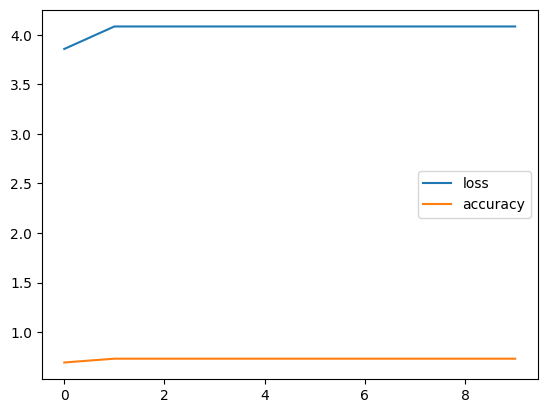

In [32]:
# dir(train_history)
# print(train_history.params)
# print(train_history.epoch)
# train_history.history.keys()
# loss = train_history.history['loss']
# print(train_history.epoch)

legend = []
for i in train_history.history.keys():
    legend.append(i)
    data = train_history.history[i]
    plt.plot(train_history.epoch,data)
plt.legend(legend)

## Model evaluation

In [33]:
model.evaluate(test_generator)

4/4 [==============================] - 31s 5s/step - loss: 4.1720 - accuracy: 0.7264


[4.171961307525635, 0.7264150977134705]

## File upload for prediction

In [ ]:
!pip install ipywidgets

In [21]:
from ipywidgets import FileUpload
from IPython.display import display
upload = FileUpload(accept='.jpg', multiple=True)

display(upload)

loaded_model=utilob.getLoadModel(BASE_DIR,model)

loaded_model.predict(upload)


FileUpload(value=(), accept='.jpg', description='Upload', multiple=True)

AttributeError: 'Sequential' object has no attribute 'load_model'

In [15]:
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
